# **MIT5672_Lab3_[Your Name]**

# Tackle the breast cancer dataset

The goal of this lab assignment is to develop multiple classification models using Support Vector Machines (SVMs) and Decision Trees to predict whether a given sample is cancerous or not. Given the inherent sensitivities of SVMs and Decision Trees to data scale and outliers, preprocessing of the dataset is imperative. You are encouraged to utilize the make_pipeline functionality in scikit-learn to seamlessly connect preprocessing steps with the model training phase. To fine-tune the model's performance, you will experiment with various hyperparameter combinations. **You will employ Grid Search to systematically identify the most effective model and hyperparameter configuration.**

For detailed information about Grid Search, please follow the instructions below:


## The `GridSearchCV()` Class in scikit-learn

The `GridSearchCV()` class in `scikit-learn`'s `model_selection` module is a powerful tool for automatically tuning hyperparameters of machine learning models. It performs an exhaustive search over a specified parameter grid, evaluating all possible combinations of hyperparameters using cross-validation.

### Using GridSearchCV with Pipelines

When using `GridSearchCV` with a pipeline in `scikit-learn`, you can specify the hyperparameters of the pipeline steps using a **double underscore (`__`)** to join the name of the pipeline step and the parameter name. This allows you to fine-tune the model hyperparameters along with preprocessing steps within the same grid search.

### Example Code

Here's an example using a pipeline that first scales the data with `StandardScaler` and then applies a Support Vector Classifier (`SVC`):

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a pipeline using make_pipeline
pipe = make_pipeline(
    StandardScaler(),
    SVC()
)

# Create a parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.001, 0.01, 0.1]
}

# Initialize Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


## Why Use the Entire Dataset with `GridSearchCV`

In a typical machine learning workflow, the `fit` method is applied to the training data (`X_train` and `y_train`) rather than the entire dataset (`X`, `y`). This ensures that the model is not exposed to the test data during training, providing an unbiased evaluation of its performance.

However, when using `GridSearchCV` in `scikit-learn`, the data you pass to `fit` gets automatically split into training and validation sets multiple times for cross-validation. This allows the algorithm to search for the best hyperparameters based on an averaged performance across these multiple splits. Therefore, it is common to see the entire dataset being used with `GridSearchCV`.


Let's fetch the data and load it:

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()

In [ ]:
list(data)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(data.target_names)

['malignant' 'benign']


In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Let's first conduct exploratory data analysis (EDA) to understand the dataset better.

#### **Q1: Convert data.data as dataframe and show the top few rows of the training set**

In [ ]:
import pandas as pd



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### **Q2: Add target to the dataframe and show basic information, e.g. the index dtype and columns, non-null values and memory usage.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### **Q3: Use a method which returns description of the data in the DataFrame, e.g. count, mean, std, min, 25%, 50%, 75%, max.**

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### **Q4: Create correlation matrix to understand relationships between features and target**

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

#### **Q5: Visualize correlations using a heatmap**

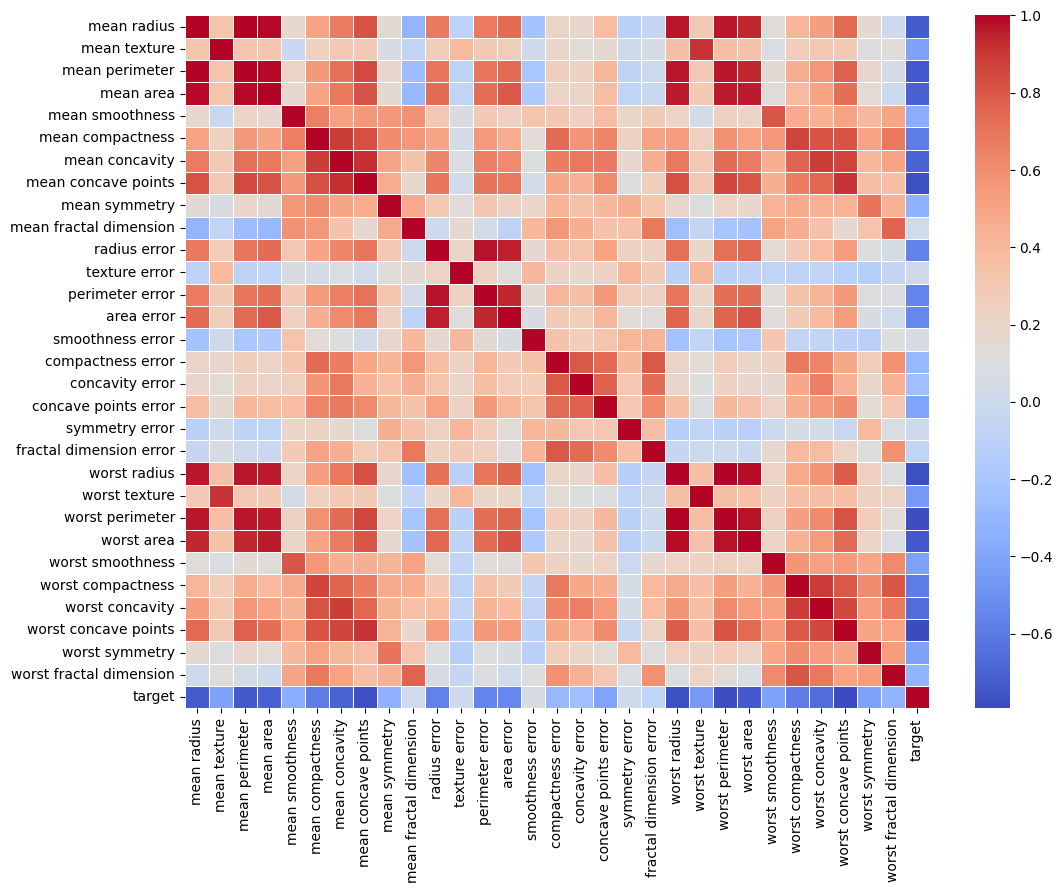

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




After conducting EDA, let's move to the modeling part.

In [ ]:
X, y = data.data, data.target

#### ~~**Q6: Split data into training and test sets (not needed if we use grid search)**~~

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Q7: Create a pipeline to connect StandardScaler and support vector machines classifier (SVC) using make_pipeline**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC





####    **Q8: Create a parameter grid for SVC (feel free to experiment with different hyperparameter values)**

In [ ]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.001, 0.01, 0.1]
}

#### **Q9: Initialize Grid Search for SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV



#### **Q10: Fit the SVC model**

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1],
                         'svc__kernel': ['linear', 'rbf']})

#### **Q11: Get the best parameters and best score (you may get different results)**

Best parameters for SVC:  {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best score for SVC:  0.9789318428815401


#### **Q12: Create a pipeline to connect StandardScaler, PCA, and Decision Trees (DT) using make_pipeline**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA






#### **Q13: Create a parameter grid for DT (feel free to experiment with different hyperparameter values)**

In [ ]:
param_grid_dt = {'decisiontreeclassifier__max_depth': [1, 3, 5, 7, 9]}

#### **Q14: Initialize Grid Search for DT**

#### **Q15: Fit the DT model**

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 3, 5, 7, 9]})

#### **Q16: Get the best parameters and best score for DT model (you may get different results)**

Best parameters for DT:  {'decisiontreeclassifier__max_depth': 9}
Best score for DT:  0.9331936034777207


#### **Q17: Click Share at the top right. Ensure sharing settings are set to "Anyone with the link can edit." Copy the shared link. Submit this link to the Canvas assignment page.**